<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/Salary Data.csv")

# Data Conversion

In [7]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [10]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Duplicates

In [11]:
df.drop_duplicates(inplace=True)

# Columns

In [12]:
df.drop(columns=['Age'], errors='ignore', inplace=True)


# Missung values

In [13]:
df.dropna(inplace=True)

# Encoding Categorical Variables

In [14]:
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

# Outliers

In [15]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# Normalization

In [16]:
scaler = MinMaxScaler()
df[['Years of Experience', 'Salary']] = scaler.fit_transform(df[['Years of Experience', 'Salary']])

In [21]:
df.values


array([[0.2, 0.35910274384137797, True, ..., False, False, False],
       [0.12, 0.25896254756659326, False, ..., False, False, False],
       [0.6, 0.5994392149008613, True, ..., False, False, False],
       ...,
       [0.64, 0.6394952934107752, False, ..., False, False, False],
       [0.12, 0.21890646905667938, True, ..., False, False, False],
       [0.76, 0.679551371920689, True, ..., False, False, False]],
      dtype=object)

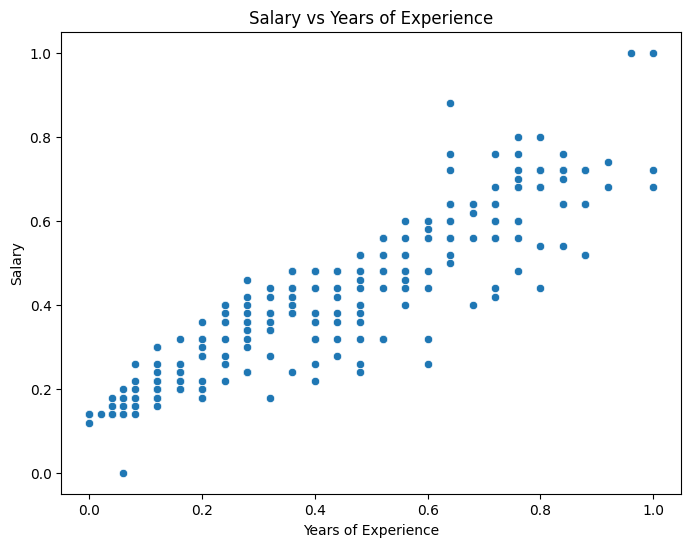

In [22]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'])
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()